## Day 19 EDA
6/Jan/2022, Thursday

## Import libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

In [ ]:
# !pip install pandas
#!pip install seaborn

## Get the Data

In [3]:
datadir_path = "house-price-prediction/"
data = pd.read_csv(datadir_path+"train.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape # no. of samples, no. of features + label

(1460, 81)

## Take a look at your data

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling missing values
1. Get rid of the row: reduces no. of samples 
2. Get rid of the feature
3. Imputation:
    - cts features: mean, median
    - discrete features: mode

In [13]:
data['LotFrontage'].isna().sum() # number of missing values in the column

259

In [16]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [27]:
grp_data = data.groupby(by=['Neighborhood'])

In [36]:
grp_data.first()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,220,120,RL,43.0,3010,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2006,New,Partial,167240
Blueste,600,160,RM,24.0,1950,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,7,2008,COD,Normal,151000
BrDale,226,160,RM,21.0,1680,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2009,COD,Abnorml,112000
BrkSide,10,190,RL,50.0,7420,Pave,Pave,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,0,1,2008,WD,Normal,118000
ClearCr,70,50,RL,81.0,15593,Pave,None,Reg,Lvl,AllPub,...,0,None,GdWo,Shed,0,7,2006,WD,Normal,225000
CollgCr,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2008,WD,Normal,208500
Crawfor,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
Edwards,40,90,RL,65.0,6040,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2008,WD,AdjLand,82000
Gilbert,51,60,RL,74.0,13869,Pave,None,IR2,Lvl,AllPub,...,0,None,MnPrv,Shed,0,7,2007,WD,Normal,177000


In [48]:
mean_LotFrontage = data.groupby(by=['Neighborhood']).mean()['LotFrontage']
mean_LotFrontage

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [68]:
# imputed the LotFrontage Column  
temp = data['LotFrontage'].fillna(data.groupby('Neighborhood')['LotFrontage'].transform('mean')) 

In [ ]:
data['LotFrontage'].fillna(data.groupby('Neighborhood')['LotFrontage'].transform('median')) 

In [82]:
data['LotFrontage'] = temp

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [89]:
## drop a features
data = data.drop(['Alley', 'MiscFeature','PoolQC', 'Fence'], axis=1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [86]:
data.drop?

In [75]:
data.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


## Feature Scaling
- min max
- Standardization

In [95]:
numerical_column = data.select_dtypes(['int64','float64'])
numerical_column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [96]:
def min_max(data):
    min_ = data.min()
    max_ = data.max()
    df = (data-min_)/(max_ - min_)
    return df

df =  min_max(data.select_dtypes(['int64','float64']))

In [98]:
df.max()

Id               1.0
MSSubClass       1.0
LotFrontage      1.0
LotArea          1.0
OverallQual      1.0
OverallCond      1.0
YearBuilt        1.0
YearRemodAdd     1.0
MasVnrArea       1.0
BsmtFinSF1       1.0
BsmtFinSF2       1.0
BsmtUnfSF        1.0
TotalBsmtSF      1.0
1stFlrSF         1.0
2ndFlrSF         1.0
LowQualFinSF     1.0
GrLivArea        1.0
BsmtFullBath     1.0
BsmtHalfBath     1.0
FullBath         1.0
HalfBath         1.0
BedroomAbvGr     1.0
KitchenAbvGr     1.0
TotRmsAbvGrd     1.0
Fireplaces       1.0
GarageYrBlt      1.0
GarageCars       1.0
GarageArea       1.0
WoodDeckSF       1.0
OpenPorchSF      1.0
EnclosedPorch    1.0
3SsnPorch        1.0
ScreenPorch      1.0
PoolArea         1.0
MiscVal          1.0
MoSold           1.0
YrSold           1.0
SalePrice        1.0
dtype: float64

In [99]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [100]:
scaler = MinMaxScaler() # create instance
scaler.fit(data.select_dtypes(['int64', 'float64']))
df2 = scaler.transform(data.select_dtypes(['int64', 'float64']))

In [102]:
type(df2)

numpy.ndarray

## Day 20 EDA - 2
7/Jan/2022, Friday

## Get Top Features

In [104]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [105]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [106]:
numerical_columns = data.select_dtypes(['int64', 'float64']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [107]:
num_data = data[numerical_columns] # subsetting data 
num_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [110]:
# compute correlation
corr = num_data.corr()

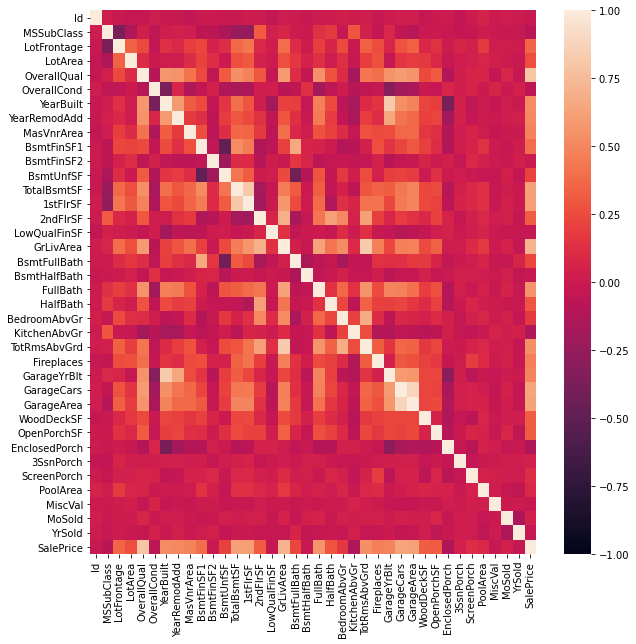

In [116]:
# to visualize corr matrix, we can use heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1)
plt.show()

In [122]:
top_features = corr['SalePrice'].nlargest(10).index
top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

## Visualization

[ 1  2  3  4  5  6  7  8  9 10] [  2   3  20 116 397 374 319 168  43  18]


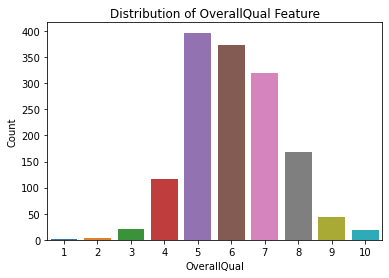

In [130]:
## Univariate
# to make the bar graph
uni_values, counts = np.unique(data['OverallQual'], return_counts=True)
print(uni_values, counts)
sns.barplot(x=uni_values, y=counts)
plt.xlabel("OverallQual")
plt.ylabel("Count")
plt.title("Distribution of OverallQual Feature")
plt.show()

In [133]:
temp = data['OverallQual'].value_counts()
temp

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [134]:
temp.index

Int64Index([5, 6, 7, 8, 4, 9, 3, 10, 2, 1], dtype='int64')

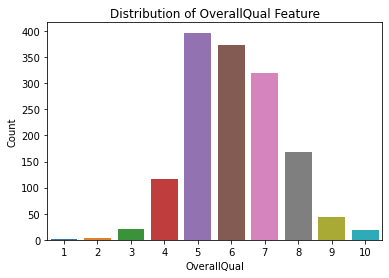

In [136]:
sns.barplot(x=temp.index, y=temp)
plt.xlabel("OverallQual")
plt.ylabel("Count")
plt.title("Distribution of OverallQual Feature")
plt.show()

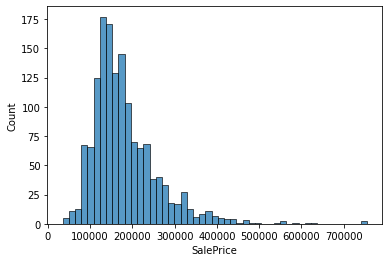

In [142]:
## Distribution of SalePrice
sns.histplot(data['SalePrice'])
plt.show()

## Bivariate Analysis

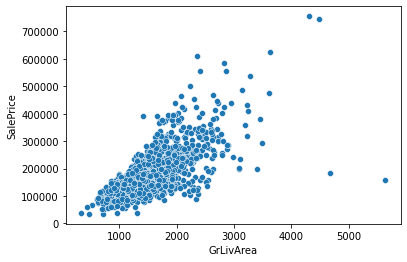

In [149]:
## analyze GrLivArea and SalePrice
# sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

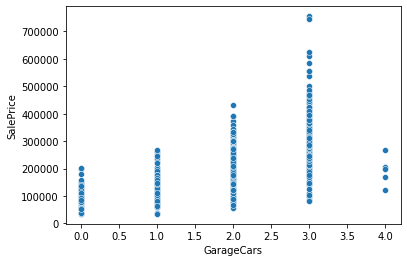

In [150]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=data)
plt.show()

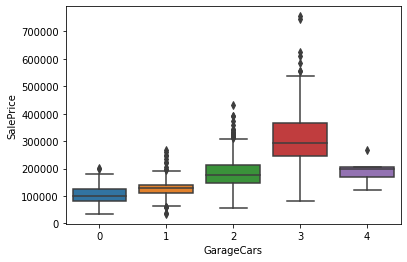

In [152]:
sns.boxplot(x='GarageCars', y='SalePrice', data=data)
plt.show()

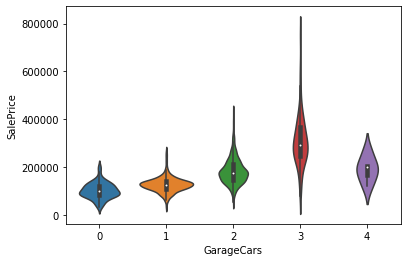

In [155]:
sns.violinplot(x='GarageCars', y='SalePrice', data=data)
plt.show()

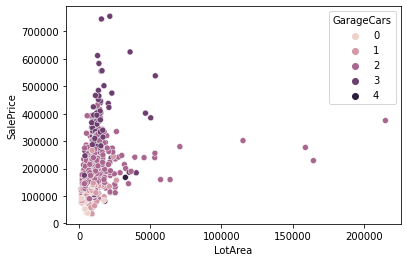

In [164]:
## Multivariate
sns.scatterplot(x='LotArea', y='SalePrice', hue='GarageCars', data=data, )
plt.show()

## Feature Encoding
- Label Encoding
- One Hot Encoding

In [166]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

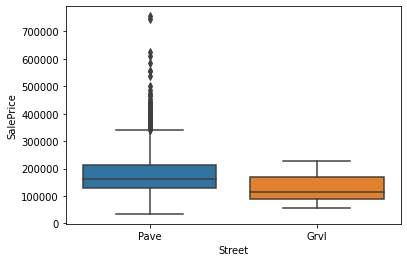

In [167]:
sns.boxplot(x='Street', y='SalePrice', data=data)
plt.show()

In [178]:
def label_encoding(data, column_name, d):
    temp = np.empty((data.shape[0],), dtype='int')
    print(temp.shape)
    for i in range(data.shape[0]):
        key = data[column_name][i]
        temp[i,] = d[key]
    return temp

In [179]:
d = {'Grvl':0, 'Pave': 1}
label_encoding(data, 'Street', d)

(1460,)


array([1, 1, 1, ..., 1, 1, 1])

In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [187]:
le = LabelEncoder()

In [188]:
a = ['b', 'b', 'r', 'r', 'r', 'o', 'o']
le.fit(a)
# le.fit_transform(a) # training data

LabelEncoder()

In [189]:
le.classes_

array(['b', 'o', 'r'], dtype='<U1')

In [190]:
le.transform(a)

array([0, 0, 2, 2, 2, 1, 1])

In [191]:
# test data: just do transform not fit
test = ['r', 'r', 'b', 'b', 'b']
encoded = le.transform(test)
encoded

array([2, 2, 0, 0, 0])

In [192]:
le.inverse_transform(encoded)

array(['r', 'r', 'b', 'b', 'b'], dtype='<U1')

In [204]:
ohe = OneHotEncoder(sparse=False)

In [205]:
a = np.array(['b', 'b', 'r', 'r', 'r', 'o', 'o']).reshape(-1,1) # train
ohe.fit(a)

OneHotEncoder(sparse=False)

In [206]:
ohe.categories_

[array(['b', 'o', 'r'], dtype='<U1')]

In [208]:
# ohe.transform(a).toarray()
ohe.transform(a)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [209]:
# on test data, do transform not fit
ohe.transform(np.array(test).reshape(-1,1))

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [224]:
oe = OneHotEncoder(sparse=False)

In [225]:
oe.fit(np.array(['Grvl', 'Pave']).reshape(-1,1))

OneHotEncoder(sparse=False)

In [226]:
oe.categories_

[array(['Grvl', 'Pave'], dtype='<U4')]

In [228]:
temp = oe.transform(data['Street'].values.reshape(-1,1))
temp

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [230]:
oe.transform(data['Street'].to_frame())

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [229]:
data['isGrvl'] = temp[:,0]
data['isPave'] = temp[:,1]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isGrvl,isPave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,175000,0.0,1.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2010,WD,Normal,210000,0.0,1.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2500,5,2010,WD,Normal,266500,0.0,1.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,142125,0.0,1.0


In [222]:
type(data.loc[:,'Street'])

pandas.core.series.Series

## Hyperparameter Tuning

In [232]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [234]:
from sklearn.linear_model import LogisticRegression

In [239]:
model = LogisticRegression()

In [240]:
params = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0, 0.1, 0.5, 1],
    'max_iter': [100, 200, 1000]
}

In [241]:
clf = GridSearchCV(estimator = model, param_grid=params, cv=5, verbose=1)

In [243]:
from sklearn.datasets import load_iris

In [244]:
iris = load_iris()

In [248]:
clf.fit(iris['data'], iris['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this tra

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1406, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(task

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_rati

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_t

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.97333333        nan        nan 0.97333333
        nan        nan 0.97333333        nan 0.94666667 0.97333333
        nan 0.94666667 0.97333333        nan 0.94666667 0.97333333
        nan 0.96666667 0.97333333        nan 0.96666667 0.97333333
        nan 0.96666667 0.97333333        nan 0.97333333 0.97333333
        nan 0.97333333 0.97333333        nan 0.97333333 0.97333333]
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 0.5, 1], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'none']},
             verbose=1)

In [257]:
clf.best_score_

0.9733333333333334

In [258]:
clf.best_params_

{'C': 0, 'max_iter': 100, 'penalty': 'none'}

In [252]:
best_model = clf.best_estimator_
best_model

LogisticRegression(C=0, penalty='none')

In [254]:
y_pred = best_model.predict(iris['data'])

In [256]:
best_model.score(iris['data'], iris['target'])

0.9866666666666667